В цехе находятся 2 станка. В цех поступают детали в среднем через каждые 35 минут (здесь и далее подразумевается, что все времена распределены экспоненциально). Обработка детали производится на одном из двух станков. Первый обрабатывает деталь в среднем за 30 минут, при этом отвергает 4% деталей, считая их бракованными. Второй обрабатывает деталь в среднем за 50 минут, при этом отвергает 8% деталей, считая их бракованными. Детали, которые были отвергнуты на обоих станках, считаются отходами и не обслуживаются цехом. Детали, которые были отвергнуты на любом станке передаются на повторную обработку на второй станок. Моделирование проводится на 500 деталей.

In [1]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Vars

In [2]:
# constants
n = 500
decline_first_machine = 20
decline_second_machine = 40
arrival_rate = 35

first_reject_amount = 0
first_success_amount = 0
second_reject_amount = 0
second_success_amount = 0

garbage_amount = 0
finished_amount = 0
repeat_amount = 0

# simulation variables
x = list(range(n))
current_time = 0
first_machine_time = 0
second_machine_time = 0

# collections of elements
customers_time = [] # arrive times distributed exponentially will be stored here
customers_status = [] # str variable for each

In [3]:
def get_random_exp_value():
    return round(random.expovariate(1.0/arrival_rate))

In [4]:
def get_service_time_value(service_rate):
    return round(random.expovariate(1.0 / service_rate))

35.842
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 2

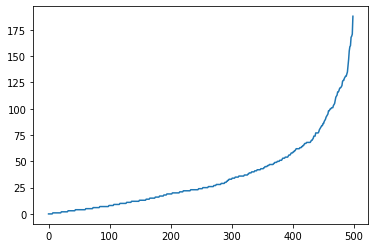

In [5]:
customers_time = []

for i in x:
    customers_time.append(get_random_exp_value())
    
customers_time.sort()
plt.plot(x, customers_time)

print(sum(customers_time)/n)
print(customers_time)

# Допустим все окей. График выглядит правдоподобно для экспоненциального распределения (?)

## Setup for other variables states

In [6]:
for i in x:
    customers_status.append('arrive')
    
customers_status

['arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',
 'arrive',

## Functions Implementation

In [7]:
# choose machine
def number_of_machine_to_work_on():
    print('choosing machine')
    rnd = random.random()
    if (rnd < 0.5):
        print('goes to machine #1')
        return 1
    else:
        print('goes to machine #2')
        return 2

In [8]:
# returns true if machine doesn't decline item
def work_with_item(percentage_for_decline):
    r = random.random()
    
    if (r < percentage_for_decline / 100):
        return 0
    return 1

In [9]:
def first_machine():
    global first_success_amount
    global first_reject_amount
    global first_machine_time
    global current_time
    
    if (work_with_item(decline_first_machine)):
        first_success_amount += 1
        
        if (first_machine_time <= current_time):
            # work is done for this item
            first_machine_time = current_time + get_service_time_value(30)
            customers_time.append(first_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            first_machine_time += get_service_time_value(30)
            customers_time.append(first_machine_time)
            customers_status.append('finished')
    else:
        first_reject_amount += 1
        customers_time.append(first_machine_time)
        customers_status.append('repeat')

In [10]:

def second_machine(isRepeating):
    global second_success_amount
    global second_reject_amount
    global second_machine_time
    global current_time
    global garbage_amount
    
    if (work_with_item(decline_second_machine)):
        second_success_amount += 1
        
        if (second_machine_time <= current_time):
            # work is done for this item
            second_machine_time = current_time + get_service_time_value(50)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            second_machine_time += get_service_time_value(50)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
    else:
        if (isRepeating == 1):
            customers_time.append(second_machine_time)
            customers_status.append('garbage')
            return
        
        second_reject_amount += 1
        customers_time.append(second_machine_time)
        customers_status.append('repeat')

## Simulation

In [11]:
i = 0 # current arrival that is supported

while (i < len(customers_time)):
    print('Customer # ', i)
    current_time = customers_time[i]
    
    # ARRIVALS
    if (customers_status[i] == 'arrive'):
        print('arrive')
        machine_number = number_of_machine_to_work_on()
        if (machine_number == 1):
            first_machine()
        if (machine_number == 2):
            second_machine(0)
    
    # FINISHED
    if (customers_status[i] == 'finished'):
        print('finished')
        finished_amount += 1
        
    # REPEAT
    if (customers_status[i] == 'repeat'):
        print('repeat')
        second_machine(1)
        repeat_amount += 1
    
    # GARBAGE
    if (customers_status[i] == 'garbage'):
        print('garbage')
        garbage_amount += 1
        
    i += 1

Customer #  0
arrive
choosing machine
goes to machine #1
Customer #  1
arrive
choosing machine
goes to machine #2
Customer #  2
arrive
choosing machine
goes to machine #2
Customer #  3
arrive
choosing machine
goes to machine #1
Customer #  4
arrive
choosing machine
goes to machine #2
Customer #  5
arrive
choosing machine
goes to machine #2
Customer #  6
arrive
choosing machine
goes to machine #2
Customer #  7
arrive
choosing machine
goes to machine #1
Customer #  8
arrive
choosing machine
goes to machine #2
Customer #  9
arrive
choosing machine
goes to machine #2
Customer #  10
arrive
choosing machine
goes to machine #1
Customer #  11
arrive
choosing machine
goes to machine #2
Customer #  12
arrive
choosing machine
goes to machine #2
Customer #  13
arrive
choosing machine
goes to machine #1
Customer #  14
arrive
choosing machine
goes to machine #1
Customer #  15
arrive
choosing machine
goes to machine #1
Customer #  16
arrive
choosing machine
goes to machine #1
Customer #  17
arrive
ch

arrive
choosing machine
goes to machine #2
Customer #  356
arrive
choosing machine
goes to machine #2
Customer #  357
arrive
choosing machine
goes to machine #1
Customer #  358
arrive
choosing machine
goes to machine #1
Customer #  359
arrive
choosing machine
goes to machine #2
Customer #  360
arrive
choosing machine
goes to machine #2
Customer #  361
arrive
choosing machine
goes to machine #2
Customer #  362
arrive
choosing machine
goes to machine #1
Customer #  363
arrive
choosing machine
goes to machine #1
Customer #  364
arrive
choosing machine
goes to machine #2
Customer #  365
arrive
choosing machine
goes to machine #1
Customer #  366
arrive
choosing machine
goes to machine #1
Customer #  367
arrive
choosing machine
goes to machine #1
Customer #  368
arrive
choosing machine
goes to machine #1
Customer #  369
arrive
choosing machine
goes to machine #2
Customer #  370
arrive
choosing machine
goes to machine #2
Customer #  371
arrive
choosing machine
goes to machine #1
Customer #  3

Customer #  707
finished
Customer #  708
finished
Customer #  709
repeat
Customer #  710
finished
Customer #  711
repeat
Customer #  712
finished
Customer #  713
finished
Customer #  714
finished
Customer #  715
repeat
Customer #  716
finished
Customer #  717
finished
Customer #  718
finished
Customer #  719
repeat
Customer #  720
finished
Customer #  721
finished
Customer #  722
repeat
Customer #  723
repeat
Customer #  724
finished
Customer #  725
finished
Customer #  726
finished
Customer #  727
finished
Customer #  728
repeat
Customer #  729
finished
Customer #  730
finished
Customer #  731
finished
Customer #  732
repeat
Customer #  733
finished
Customer #  734
finished
Customer #  735
finished
Customer #  736
finished
Customer #  737
repeat
Customer #  738
repeat
Customer #  739
finished
Customer #  740
finished
Customer #  741
finished
Customer #  742
repeat
Customer #  743
repeat
Customer #  744
repeat
Customer #  745
finished
Customer #  746
finished
Customer #  747
repeat
Cus

## Results

In [12]:
print('Rejects: ', first_reject_amount + second_reject_amount)
print('Successes: ', first_success_amount + second_success_amount)
print('Garbage items: ', garbage_amount)
print('Finishes: ', finished_amount)
print('Repeats: ', repeat_amount)

Rejects:  152
Successes:  435
Garbage items:  65
Finishes:  435
Repeats:  152
